In [2]:
library(dplyr)
library(ggplot2)

In [3]:
# v0: union of ips + mesendo + defendo eQTL (pseudobulk, expanded K, FDR<10%)

In [4]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [5]:
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 1,]
nrow(leads.ips.sign)

[1] 10840

In [6]:
leads.mes.sign = leads.mes[leads.mes$global_corr_p_value < 1,]
nrow(leads.mes.sign)

[1] 10924

In [7]:
leads.defendo.sign = leads.defendo[leads.defendo$global_corr_p_value < 1,]
nrow(leads.defendo.sign)

[1] 10901

In [8]:
leads.ips.sign$stage = "ips"
leads.mes.sign$stage = "mesendo"
leads.defendo.sign$stage = "defendo"

In [9]:
colnames(leads.ips.sign)

[1] "beta"                      "beta_se"                  
 [3] "empirical_feature_p_value" "p_value"                  
 [5] "snp_id"                    "feature"                  
 [7] "global_corr_p_value"       "chrom"                    
 [9] "pos"                       "ref_allele"               
[11] "alt_allele"                "permutation_0"            
[13] "permutation_1"             "permutation_2"            
[15] "permutation_3"             "permutation_4"            
[17] "permutation_5"             "permutation_6"            
[19] "permutation_7"             "permutation_8"            
[21] "permutation_9"             "stage"

In [10]:
cols = c("snp_id","feature","stage","p_value","beta","global_corr_p_value")

In [11]:
endo_eqtl = rbind(leads.ips.sign[,cols], 
                 leads.mes.sign[,cols],
                 leads.defendo.sign[,cols])

In [12]:
head(endo_eqtl,2)

snp_id,feature,stage,p_value,beta,global_corr_p_value
5_149826526_C_T,ENSG00000164587_RPS14,ips,3.851118e-36,-1.0048674,2.880363e-30
11_57283988_C_T,ENSG00000134809_TIMM10,ips,3.147553e-30,-0.9881017,8.853960e-23


In [13]:
# v0: CellRegMap (single cells, expanded K*CCt + CCt)

In [14]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/CellRegMap_Gtest/MOFA/"

In [15]:
res_file = paste0(mydir, "summary.csv")
res = read.csv(res_file, row.names=1)
nrow(res)
res$feature = res$gene
res$snp_id = res$snpID
res$p_value = res$pv
head(res,2)

[1] 2236

,gene,n_snps,chrom,pv_raw,snpID,pv,feature,snp_id,p_value
0,ENSG00000011523_CEP68,2,2,6.092514e-06,2_65279223_C_T,1.218503e-05,ENSG00000011523_CEP68,2_65279223_C_T,1.218503e-05
1,ENSG00000011523_CEP68,2,2,2.872373e-06,2_65290842_C_A,5.744745e-06,ENSG00000011523_CEP68,2_65290842_C_A,5.744745e-06


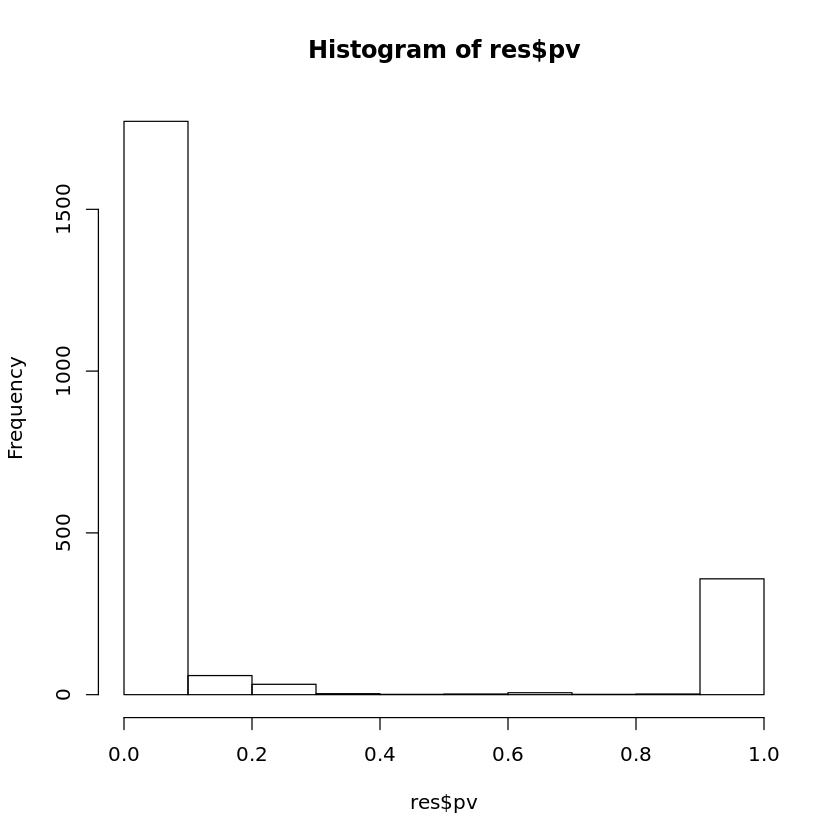

In [16]:
hist(res$pv)

In [17]:
cols = c("feature","snp_id","p_value")
df = inner_join(endo_eqtl[,cols], res[,cols], by = c("feature","snp_id"), suffix=c(".old",".new"))

In [18]:
head(df)

feature,snp_id,p_value.old,p_value.new
ENSG00000163682_RPL9,4_39446549_G_A,2.553619e-46,2.225074e-308
ENSG00000189266_PNRC2,1_24364016_T_C,2.749088e-24,2.225074e-308
ENSG00000186230_ZNF749,19_57939619_C_T,4.595999e-28,1.552269e-288
ENSG00000233927_RPS28,19_8387207_G_A,1.060863e-36,2.225074e-308
ENSG00000076924_XAB2,19_7675917_C_G,1.796718e-31,4.450148e-308
ENSG00000229150_CRYGEP,2_208977797_G_T,3.356299e-24,7.060338e-134


In [19]:
cor.test(-log10(df$p_value.old), -log10(df$p_value.new))


	Pearson's product-moment correlation

data:  -log10(df$p_value.old) and -log10(df$p_value.new)
t = 59.954, df = 1905, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7923220 0.8234607
sample estimates:
      cor 
0.8084564 


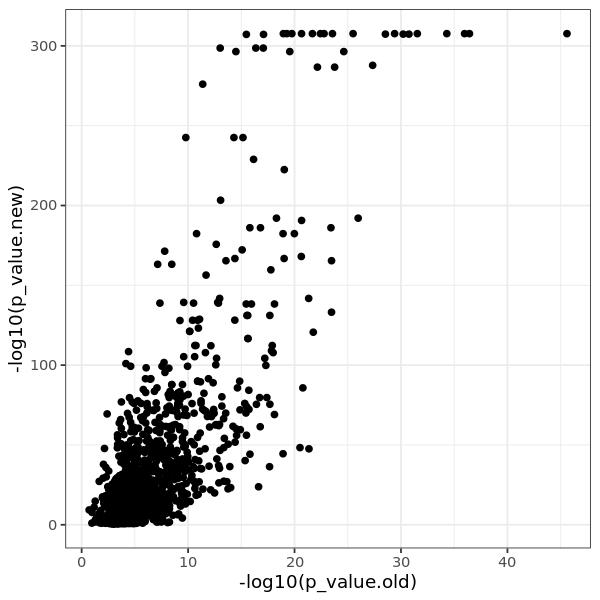

In [20]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df, aes(x=-log10(p_value.old), y=-log10(p_value.new))) + geom_point() + theme_bw()

In [ ]:
# v1: limix_qtl with two random effects (single cells, expanded K + CCt)

In [1]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/limix_qtl_pipeline_Gtest/Gtest_10MOFA/"

In [2]:
res_file = paste0(mydir, "results_mj/top_qtl_results_all.txt")
res = read.csv(res_file, sep="\t")

In [3]:
nrow(res)
head(res,2)

[1] 864

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_57703077_T_G,9.758964e-06,-0.06163494,0.01393437,2.335648e-07,19,57702868,57724724,27598,99,1.859690,37.35126,0.8,19,57703077,G,1,0.4141414,1.00000000,ENSG00000083844
19_53816432_C_T,5.936559e-04,-0.06402515,0.01863979,6.353399e-03,19,53662466,53696639,27598,99,1.519646,74.48449,0.9,19,53816432,T,1,0.3939394,0.09246273,ENSG00000197497


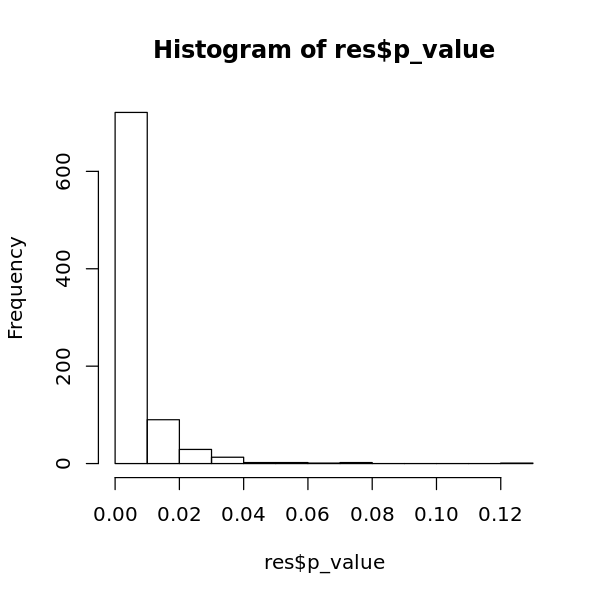

In [24]:
hist(res$p_value)

In [25]:
endo_eqtl$feature_id = gsub("_.*","",endo_eqtl$feature)

In [26]:
head(endo_eqtl$feature_id)

[1] "ENSG00000164587" "ENSG00000134809" "ENSG00000197728" "ENSG00000214087"
[5] "ENSG00000198563" "ENSG00000163682"

In [27]:
cols = c("feature_id","snp_id","p_value")
df = inner_join(endo_eqtl[,cols], res[,cols], by = c("feature_id","snp_id"), suffix=c(".old",".new"))

In [28]:
nrow(df)

[1] 104

In [29]:
cor.test(-log10(df$p_value.old), -log10(df$p_value.new))


	Pearson's product-moment correlation

data:  -log10(df$p_value.old) and -log10(df$p_value.new)
t = 18.276, df = 102, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8210612 0.9138041
sample estimates:
      cor 
0.8752492 


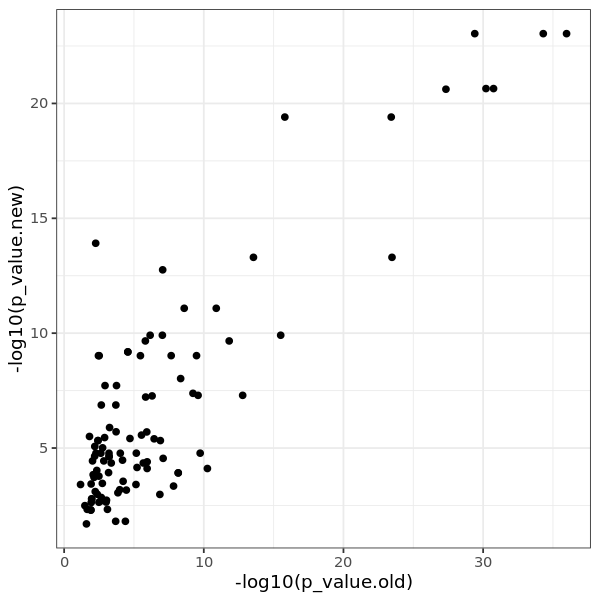

In [30]:
options(repr.plot.width=5, repr.plot.height=5)
ggplot(df, aes(x=-log10(p_value.old), y=-log10(p_value.new))) + geom_point() + theme_bw()